https://github.com/ahmedayman1420/Fraud-Detection-in-Electricity-and-Gas-Consumption/blob/main/preprocessor.ipynb


GPT-3


# Fraud Detection in Electricity and Gas Consumption Challenge


**Quel est l'objectif principal? Dans quel contexte? (SMART)**

L'objectif principal est de développer une solution d'apprentissage automatique (ML) pour détecter et reconnaître les clients impliqués dans des activités frauduleuses liées à la consommation d'électricité et de gaz de la Société Tunisienne d'Électricité et de Gaz (STEG). Le contexte est la prévention des pertes de revenus, en mettant l'accent sur les importantes pertes financières (200 millions de dinars tunisiens) subies par la STEG en raison de manipulations frauduleuses de compteurs par les consommateurs.

**Quelle valeur ajoute-t-il? (analyse coûts-bénéfices, incluant la maintenance)**

La solution vise à augmenter les revenus de l'entreprise en identifiant et en atténuant les activités frauduleuses, réduisant ainsi les pertes financières. Cette initiative a un impact direct coûts-bénéfices en protégeant les intérêts financiers de l'entreprise. La mise en œuvre de la solution nécessitera probablement un investissement initial dans le développement de l'apprentissage automatique, mais les avantages potentiels en termes de protection des revenus en font une entreprise précieuse. Les coûts de maintenance doivent être comparés aux gains attendus en protection des revenus.

**Peut-on le résoudre sans ML? Est-ce faisable?**

Bien que certaines méthodes traditionnelles, telles que les audits manuels, puissent être utilisées pour identifier des activités frauduleuses, l'apprentissage automatique offre une solution plus efficace et évolutive. L'apprentissage automatique peut analyser de grands ensembles de données et détecter des schémas complexes qui peuvent être difficiles à repérer par des processus manuels. Étant donné l'ampleur du problème et la complexité de l'identification des activités frauduleuses, l'apprentissage automatique est susceptible de fournir une approche plus efficace et faisable.

**Avons-nous suffisamment de données de qualité? (correctes, représentatives, pouvoir prédictif)**

Le succès de la solution d'apprentissage automatique dépend de la disponibilité de données de haute qualité. Les données historiques de facturation des clients sont cruciales pour former un modèle capable de détecter avec précision des schémas frauduleux. Les données doivent être correctes, représentatives de divers scénarios et posséder un pouvoir prédictif pour garantir que le modèle généralise bien à de nouveaux cas de fraudes potentielles.

**Exprimer l'objectif techniquement :**

**Quel est l'objectif du modèle (mesurable)? Quelle est la métrique de succès/échec?**

L'objectif du modèle est de prédire la probabilité qu'un client soit impliqué dans des activités frauduleuses liées à la consommation d'électricité et de gaz. La métrique de succès est l'aire sous la courbe (AUC) lors de l'évaluation de la performance du modèle. Une AUC plus élevée indique une meilleure discrimination entre les cas frauduleux et non frauduleux.

**Quelles sont les entrées et sorties du modèle?**

- **Entrée :** Données de facturation historiques des clients, y compris les habitudes de consommation, l'historique des paiements et toutes les caractéristiques pertinentes pouvant indiquer un comportement frauduleux.

- **Sortie :** Un score de probabilité pour chaque client, indiquant la probabilité de participer à des activités frauduleuses. Le format de sortie est conforme au fichier de soumission, où chaque client est associé à une probabilité cible.

**Quelle est la mesure de performance?**

La performance du modèle est mesurée à l'aide de l'AUC, fournissant une évaluation globale de sa capacité à distinguer entre les cas frauduleux et non frauduleux.

**Quels sont les références non basées sur l'apprentissage automatique?**

Les références non basées sur l'apprentissage automatique peuvent inclure des méthodes traditionnelles telles que des audits manuels, des systèmes basés sur des règles ou des approches statistiques. Ces méthodes peuvent reposer sur des règles prédéfinies ou des seuils pour signaler des activités potentiellement frauduleuses. Cependant, on s'attend à ce que l'apprentissage automatique surpasse ces références en exploitant la puissance de l'apprentissage basé sur les données pour identifier des schémas et des anomalies plus complexes associés à la fraude.

## Download and extract files


In [1]:
# !gdown 1bzjA-fjCOBCOlhnbwAhrhS1d22Gl14-v
# !gdown 10UyqIzH8Xhdum-JUwlqwD30VQjqLUKBu
# !gdown 17nj7u6wM4-cZmn79gKJ5YyJVJ5P5qHvq


In [2]:
# !yes |unzip test.zip

In [3]:
# !yes |unzip train.zip

# Data Prep

## Import Libraries

In [4]:

import numpy as np
import pandas as pd
import datetime
import gc
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')
np.random.seed(4590)
import lightgbm
from lightgbm import LGBMClassifier

import warnings
warnings.simplefilter('ignore')

## Read the Data

In [5]:
train_client=pd.read_csv('/content/client_train.csv')
test_client=pd.read_csv('/content/client_test.csv')
train_invoice=pd.read_csv('/content/invoice_train.csv')
test_invoice=pd.read_csv('/content/invoice_test.csv')

# sub=pd.read_csv('/content/SampleSubmission.csv')

## Data Understanding

In [6]:
train_client.head()

,disrict,client_id,client_catg,region,creation_date,target
0,60,train_Client_0,11,101,31/12/1994,0.0
1,69,train_Client_1,11,107,29/05/2002,0.0
2,62,train_Client_10,11,301,13/03/1986,0.0
3,69,train_Client_100,11,105,11/07/1996,0.0
4,62,train_Client_1000,11,303,14/10/2014,0.0


In [7]:
train_client.shape

(135493, 6)

In [8]:
train_client.describe()

,disrict,client_catg,region,target
count,135493.000000,135493.000000,135493.000000,135493.000000
mean,63.511222,11.512506,206.159809,0.055841
std,3.354400,4.423761,104.207044,0.229614
min,60.000000,11.000000,101.000000,0.000000
25%,62.000000,11.000000,103.000000,0.000000
50%,62.000000,11.000000,107.000000,0.000000
75%,69.000000,11.000000,307.000000,0.000000
max,69.000000,51.000000,399.000000,1.000000


In [9]:
train_invoice.shape

(4476749, 16)

In [10]:
train_invoice.describe()

,tarif_type,counter_number,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number
count,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06
mean,2.012804e+01,1.230587e+11,1.724884e+02,7.321702e+00,1.003040e+00,4.109795e+02,1.093225e+02,2.030620e+01,5.292588e+01,1.776700e+04,1.834970e+04,4.483095e+01
std,1.347256e+01,1.657267e+12,1.338871e+02,1.571654e+00,3.083466e-01,7.573080e+02,1.220123e+03,1.574239e+02,8.754725e+02,4.036693e+04,4.095321e+04,3.128335e+03
min,8.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.100000e+01,1.211080e+05,5.000000e+00,6.000000e+00,1.000000e+00,7.900000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.791000e+03,2.056000e+03,4.000000e+00
50%,1.100000e+01,4.945610e+05,2.030000e+02,8.000000e+00,1.000000e+00,2.740000e+02,0.000000e+00,0.000000e+00,0.000000e+00,7.690000e+03,8.192000e+03,4.000000e+00
75%,4.000000e+01,1.115161e+06,2.070000e+02,9.000000e+00,1.000000e+00,6.000000e+02,0.000000e+00,0.000000e+00,0.000000e+00,2.166000e+04,2.234300e+04,4.000000e+00
max,4.500000e+01,2.798115e+13,6.000000e+02,4.130000e+02,5.000000e+01,9.999100e+05,9.990730e+05,6.449200e+04,5.479460e+05,2.800280e+06,2.870972e+06,6.366240e+05


In [11]:
train_client.columns

Index(['disrict', 'client_id', 'client_catg', 'region', 'creation_date',
       'target'],
      dtype='object')

In [12]:
train_invoice.columns

Index(['client_id', 'invoice_date', 'tarif_type', 'counter_number',
       'counter_statue', 'counter_code', 'reading_remarque',
       'counter_coefficient', 'consommation_level_1', 'consommation_level_2',
       'consommation_level_3', 'consommation_level_4', 'old_index',
       'new_index', 'months_number', 'counter_type'],
      dtype='object')

In [13]:
train_client.dtypes

disrict            int64
client_id         object
client_catg        int64
region             int64
creation_date     object
target           float64
dtype: object

In [14]:
train_invoice.dtypes

client_id               object
invoice_date            object
tarif_type               int64
counter_number           int64
counter_statue          object
counter_code             int64
reading_remarque         int64
counter_coefficient      int64
consommation_level_1     int64
consommation_level_2     int64
consommation_level_3     int64
consommation_level_4     int64
old_index                int64
new_index                int64
months_number            int64
counter_type            object
dtype: object

In [15]:
#Getting unique values on the invoice train data
for col in train_invoice.columns:
    print(f"{col} - {train_invoice[col].nunique()}")

client_id - 135493
invoice_date - 8275
tarif_type - 17
counter_number - 201893
counter_statue - 16
counter_code - 42
reading_remarque - 8
counter_coefficient - 16
consommation_level_1 - 8295
consommation_level_2 - 12576
consommation_level_3 - 2253
consommation_level_4 - 12075
old_index - 155648
new_index - 157980
months_number - 1370
counter_type - 2


In [16]:
#Getting unique values on the invoice train data
for col in train_client.columns:
    print(f"{col} - {train_client[col].nunique()}")

disrict - 4
client_id - 135493
client_catg - 3
region - 25
creation_date - 8088
target - 2


In [17]:
#check for missing values
train_invoice.isnull().sum()

client_id               0
invoice_date            0
tarif_type              0
counter_number          0
counter_statue          0
counter_code            0
reading_remarque        0
counter_coefficient     0
consommation_level_1    0
consommation_level_2    0
consommation_level_3    0
consommation_level_4    0
old_index               0
new_index               0
months_number           0
counter_type            0
dtype: int64

In [18]:
#check for missing values
train_client.isnull().sum()

disrict          0
client_id        0
client_catg      0
region           0
creation_date    0
target           0
dtype: int64


Il semble que le DataFrame train_invoice et train_client ne contient pas de valeurs manquantes (NaN ou null) dans aucune de ses colonnes.

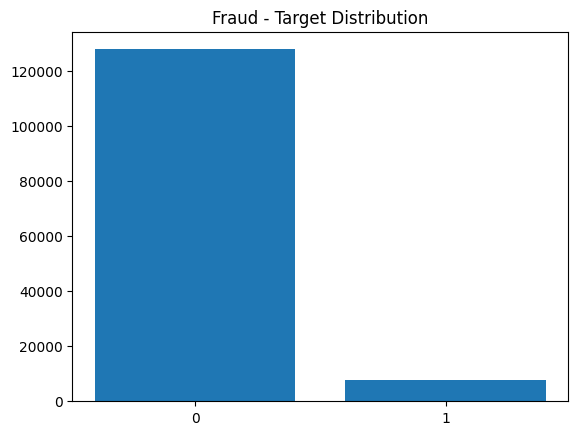

In [19]:
#Visualize fraudulent activities
fraudactivities = train_client.groupby(['target'])['client_id'].count()
plt.bar(x=fraudactivities.index, height=fraudactivities.values, tick_label = [0,1])
plt.title('Fraud - Target Distribution')
plt.show()

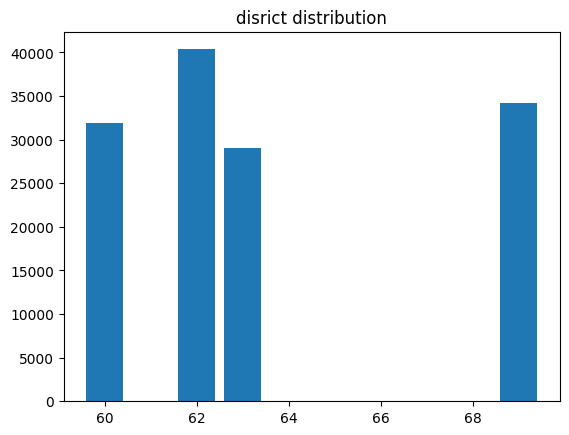

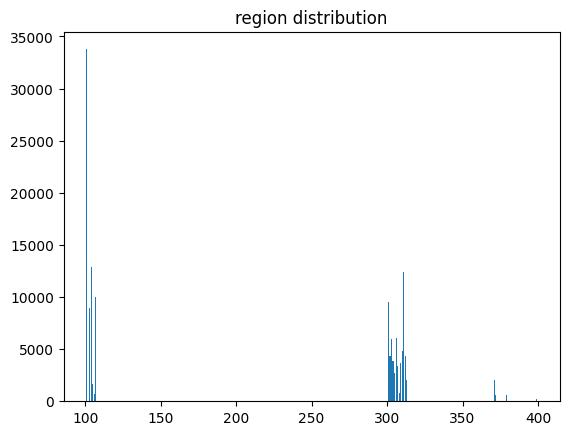

In [20]:
#Visualize client distribution across districts and regions
for col in ['disrict','region']:
    region = train_client.groupby([col])['client_id'].count()
    plt.bar(x=region.index, height=region.values)
    plt.title(col+' distribution')
    plt.show()

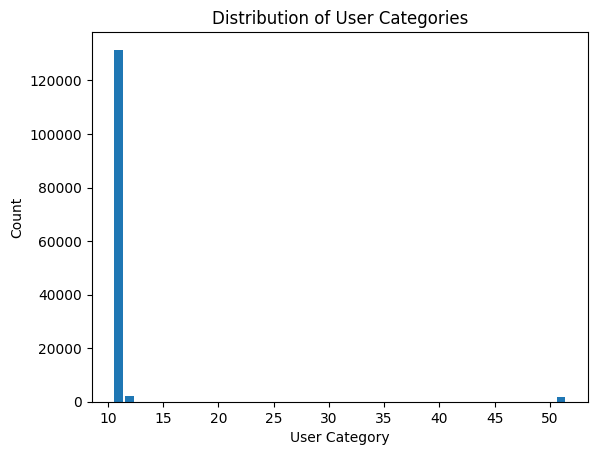

Nous avons 3 catégories (11, 12, 51), la plupart des clients sont associés à la catégorie 11..


In [21]:
# Count the number of occurrences of each category
category_counts = train_client['client_catg'].value_counts()

# Create a bar chart of the category counts
plt.bar(category_counts.index, category_counts.values)

# Set axis labels and title
plt.xlabel('User Category')
plt.ylabel('Count')
plt.title('Distribution of User Categories')

# Display the plot
plt.show()
print("Nous avons 3 catégories (11, 12, 51), la plupart des clients sont associés à la catégorie 11..")

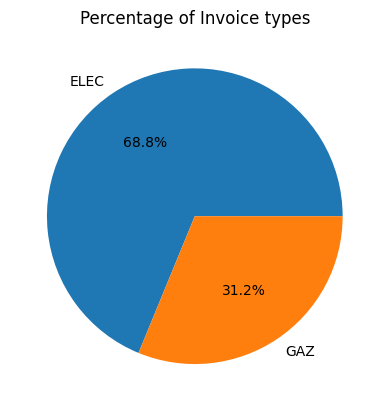

In [22]:
#Showing pie chart for Electricity and Gas invoices
counts = train_invoice['counter_type'].value_counts()
percentages = (counts / len(train_invoice)) * 100

plt.pie(percentages, labels=counts.index, autopct='%1.1f%%')
plt.title('Percentage of Invoice types')
plt.show()

## Feature Engineering

In [23]:
train_invoice['counter_type'].unique()

array(['ELEC', 'GAZ'], dtype=object)

In [24]:
#Label encoding the counter_type
d={"ELEC":0,"GAZ":1}
train_invoice['counter_type']=train_invoice['counter_type'].map(d)

In [25]:
#Label encoding the counter_type
d={"ELEC":0,"GAZ":1}
test_invoice['counter_type']=test_invoice['counter_type'].map(d)

In [26]:
train_invoice['counter_type']

0          0
1          0
2          0
3          0
4          0
          ..
4476744    0
4476745    0
4476746    0
4476747    0
4476748    0
Name: counter_type, Length: 4476749, dtype: int64

In [27]:
train_invoice['counter_type'].value_counts()

0    3079406
1    1397343
Name: counter_type, dtype: int64

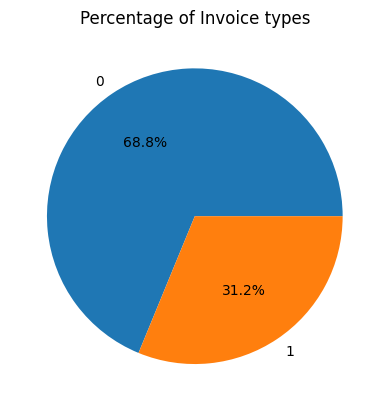

In [28]:
#Showing pie chart for Electricity and Gas invoices
counts = train_invoice['counter_type'].value_counts()
percentages = (counts / len(train_invoice)) * 100

plt.pie(percentages, labels=counts.index, autopct='%1.1f%%')
plt.title('Percentage of Invoice types')
plt.show()

In [29]:
train_client['client_catg'].unique()

array([11, 12, 51])

In [30]:
train_client['disrict'].unique()

array([60, 69, 62, 63])

In [31]:
#changing the invoice date to datetime
for df in [train_invoice,test_invoice]:
    df['invoice_date'] = pd.to_datetime(df['invoice_date'])


In [32]:
unique_info = pd.Series(train_invoice['client_id'].value_counts())
print(unique_info)


train_Client_116878    439
train_Client_9263      380
train_Client_130245    327
train_Client_59131     317
train_Client_61728     310
                      ... 
train_Client_23589       1
train_Client_8426        1
train_Client_49342       1
train_Client_114075      1
train_Client_27751       1
Name: client_id, Length: 135493, dtype: int64


In [33]:

aggs = {}
aggs['consommation_level_1'] = ['mean']
aggs['consommation_level_2'] = ['mean']
aggs['consommation_level_3'] = ['mean']
aggs['consommation_level_4'] = ['mean']


In [34]:

agg_trans = train_invoice.groupby(['client_id']).agg(aggs)
agg_trans.columns = ['_'.join(col).strip() for col in agg_trans.columns.values]
agg_trans.reset_index(inplace=True)

df = (train_invoice.groupby('client_id')
      .size()
      .reset_index(name='{}transactions_count'.format('1')))

agg_trans = pd.merge(df, agg_trans, on='client_id', how='left')


In [35]:
agg_trans.head()

,client_id,1transactions_count,consommation_level_1_mean,consommation_level_2_mean,consommation_level_3_mean,consommation_level_4_mean
0,train_Client_0,35,352.400000,10.571429,0.000000,0.000000
1,train_Client_1,37,557.540541,0.000000,0.000000,0.000000
2,train_Client_10,18,798.611111,37.888889,0.000000,0.000000
3,train_Client_100,20,1.200000,0.000000,0.000000,0.000000
4,train_Client_1000,14,663.714286,104.857143,117.357143,36.714286


In [36]:
train = pd.merge(train_client,agg_trans, on='client_id', how='left')

In [37]:
agg_trans = test_invoice.groupby(['client_id']).agg(aggs)
agg_trans.columns = ['_'.join(col).strip() for col in agg_trans.columns.values]
agg_trans.reset_index(inplace=True)

df = (test_invoice.groupby('client_id')
      .size()
      .reset_index(name='{}transactions_count'.format('1')))

agg_trans = pd.merge(df, agg_trans, on='client_id', how='left')


In [38]:
test = pd.merge(test_client,agg_trans, on='client_id', how='left')

In [39]:
train.head()

,disrict,client_id,client_catg,region,creation_date,target,1transactions_count,consommation_level_1_mean,consommation_level_2_mean,consommation_level_3_mean,consommation_level_4_mean
0,60,train_Client_0,11,101,31/12/1994,0.0,35,352.400000,10.571429,0.000000,0.000000
1,69,train_Client_1,11,107,29/05/2002,0.0,37,557.540541,0.000000,0.000000,0.000000
2,62,train_Client_10,11,301,13/03/1986,0.0,18,798.611111,37.888889,0.000000,0.000000
3,69,train_Client_100,11,105,11/07/1996,0.0,20,1.200000,0.000000,0.000000,0.000000
4,62,train_Client_1000,11,303,14/10/2014,0.0,14,663.714286,104.857143,117.357143,36.714286


In [40]:
train.shape,test.shape

((135493, 11), (58069, 10))

In [41]:
for df in [train,test]:
    df['creation_date'] = pd.to_datetime(df['creation_date'])

In [42]:
col_to_drop = ['client_id', 'creation_date']
for col in col_to_drop:
    if col in train.columns:
        train.drop([col], axis=1, inplace=True)
    if col in test.columns:
        test.drop([col], axis=1, inplace=True)

In [43]:
all_data_na = train.isnull().sum()
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing ' :all_data_na})
missing_data.head(20)

,Missing


# Modelling

## Train LGBM *Classifier*

In [44]:
target=train['target']
train.drop('target',axis=1,inplace=True)

In [45]:
import lightgbm
from lightgbm import LGBMClassifier
model = LGBMClassifier(boosting_type='gbdt',num_iteration=500, silent=True)

#Fit to training data
%time model.fit(train,target)

[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] num_iterations is set=500, num_iteration=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Info] Number of positive: 7566, number of negative: 127927
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015837 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1296
[LightGBM] [Info] Number of data points in the train set: 135493, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.055841 -> initscore=-2.827795
[LightGBM] [Info] Start training from score -2.827795
CPU times: user 4.81 s, sys: 26.6 ms, total: 4.83 s
Wall time: 4.8 s


LGBMClassifier(num_iteration=500, silent=True)

## Make Predictions on test set

In [46]:
test.columns

Index(['disrict', 'client_catg', 'region', '1transactions_count',
       'consommation_level_1_mean', 'consommation_level_2_mean',
       'consommation_level_3_mean', 'consommation_level_4_mean'],
      dtype='object')

In [47]:
preds = model.predict(test)
preds = pd.DataFrame(preds, columns=['target'])
preds.head()

[LightGBM] [Warning] Unknown parameter: silent


,target
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [48]:
preds['target']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
58064    0.0
58065    0.0
58066    0.0
58067    0.0
58068    0.0
Name: target, Length: 58069, dtype: float64

In [53]:
# # Assume que sub_client_id a déjà été défini quelque part dans votre code


# submission = pd.DataFrame({
#         "client_id": sub["client_id"],
#         "target": preds['target']
#     })
# submission.to_csv('submission.csv', index=False)



In [54]:
# submission.head()

In [55]:
# submission['target'].value_counts()

#OPTUNA

In [56]:
pip install optuna

In [84]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score
import optuna

# Assurez-vous que 'train', 'train_labels', 'test', et 'test_labels' sont définis correctement

def objective(trial):
    param = {
        "num_leaves": trial.suggest_int("num_leaves", 20, 100),
        "learning_rate": trial.suggest_float("learning_rate", 0.001, 0.1),
        # Autres hyperparamètres
    }

    model = LGBMClassifier(**param)
    model.fit(train, target)
    preds = model.predict(test)
    accuracy = accuracy_score(train, preds)
    return accuracy

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=10)


[I 2024-01-11 21:08:56,386] A new study created in memory with name: no-name-17937631-278e-4850-b2aa-60b5db4395c4


[LightGBM] [Info] Number of positive: 7566, number of negative: 127927
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.030376 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1296
[LightGBM] [Info] Number of data points in the train set: 135493, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.055841 -> initscore=-2.827795
[LightGBM] [Info] Start training from score -2.827795


[W 2024-01-11 21:09:00,323] Trial 0 failed with parameters: {'num_leaves': 71, 'learning_rate': 0.026829950931564605} because of the following error: ValueError('Found input variables with inconsistent numbers of samples: [135493, 58069]').
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/optuna/study/_optimize.py", line 200, in _run_trial
    value_or_values = func(trial)
  File "<ipython-input-84-0ae32f8c8e31>", line 17, in objective
    accuracy = accuracy_score(train, preds)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 192, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 221, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 86, in _check_targets
    check_consistent_length(y_true, y_pred)
  File "/usr/l

ValueError: Found input variables with inconsistent numbers of samples: [135493, 58069]

#Hyperopt

In [58]:
from hyperopt import hp, fmin, tpe, Trials
from lightgbm import LGBMClassifier

space = {
    "num_leaves": hp.choice("num_leaves", [20, 30, 50, 100]),
    "learning_rate": hp.uniform("learning_rate", 0.001, 0.1),
}

def objective(params):
    model = LGBMClassifier(**params)
    model.fit(train, target)
    preds = model.predict(test)
    accuracy = accuracy_score(target, preds)
    return -accuracy

best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=100)


[LightGBM] [Info] Number of positive: 7566, number of negative: 127927
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.016210 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1296
[LightGBM] [Info] Number of data points in the train set: 135493, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.055841 -> initscore=-2.827795
[LightGBM] [Info] Start training from score -2.827795
  0%|          | 0/100 [00:00<?, ?trial/s, best loss=?]

ERROR:hyperopt.fmin:job exception: Found input variables with inconsistent numbers of samples: [135493, 58069]


  0%|          | 0/100 [00:01<?, ?trial/s, best loss=?]


ValueError: Found input variables with inconsistent numbers of samples: [135493, 58069]

#BayesianOptimization:

In [63]:
!pip install colorama

In [65]:
pip install bayesian-optimization

In [76]:
from bayes_opt import BayesianOptimization
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score

def lgb_eval(num_leaves, learning_rate):
    params = {'num_leaves': int(num_leaves), 'learning_rate': learning_rate}
    clf = LGBMClassifier(**params)
    clf.fit(train, target)
    predictions = clf.predict(test)
    accuracy = accuracy_score(train, predictions)
    return accuracy

optimizer = BayesianOptimization(f=lgb_eval, pbounds={'num_leaves': (20, 100), 'learning_rate': (0.01, 0.3)})
optimizer.maximize(init_points=2, n_iter=10)


|   iter    |  target   | learni... | num_le... |
-------------------------------------------------
[LightGBM] [Info] Number of positive: 7566, number of negative: 127927
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.082449 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1296
[LightGBM] [Info] Number of data points in the train set: 135493, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.055841 -> initscore=-2.827795
[LightGBM] [Info] Start training from score -2.827795


ValueError: Found input variables with inconsistent numbers of samples: [135493, 58069]

#Scikit-Optimize

In [71]:
!pip install scikit-optimize

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 1.1 MB/s eta 0:00:00


In [72]:
from skopt import gp_minimize
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score

def lgb_eval(params):
    num_leaves, learning_rate = params
    clf = LGBMClassifier(num_leaves=int(num_leaves), learning_rate=learning_rate)
    clf.fit(train, target)
    predictions = clf.predict(test)
    accuracy = accuracy_score(train, predictions)
    return -accuracy  # Minimiser l'opposé de l'accuracy

result = gp_minimize(lgb_eval, [(20, 100), (0.01, 0.3)], n_calls=15, random_state=0)


[LightGBM] [Info] Number of positive: 7566, number of negative: 127927
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015141 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1296
[LightGBM] [Info] Number of data points in the train set: 135493, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.055841 -> initscore=-2.827795
[LightGBM] [Info] Start training from score -2.827795


ValueError: Found input variables with inconsistent numbers of samples: [135493, 58069]

#GPyOpt

In [73]:
!pip install GPyOpt


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 741.3 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 959.4/959.4 kB 9.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.3/71.3 kB 7.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for GPyOpt: filename=GPyOpt-1.2.6-py3-none-any.whl size=83588 sha256=d58e6ff682977ec1aa875550588d3e81ad26bc63643ac97e895148b3bd9df8c6
  Stored in directory: /root/.cache/pip/wheels/72/17/52/9d818b4c60f733bf49d5cf82bc2758ebbdc57a0471137c37be
  Created wheel for GPy: filename=GPy-1.10.0-cp310-cp310-linux_x86_64.whl size=3421255 sha256=b93c34bf3dc3b68a3cf8306e8391832830b03826b9466e075dc35acced5838ad
  Stored in directory: /root/.cache/pip/wheels/27/bd/9f/82ab4216eae088cba864ca0dc1d75699bd4bf6823790fb2f77
  Created wheel for paramz: filename=paramz-0.9.5-py3-none-any.whl size=102543 sha256=51c77ffada3c4431ddd33560

In [74]:
import GPyOpt
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score

def lgb_eval(params):
    num_leaves, learning_rate = params[0]
    clf = LGBMClassifier(num_leaves=int(num_leaves), learning_rate=learning_rate)
    clf.fit(train_data, train_labels)
    predictions = clf.predict(valid_data)
    accuracy = accuracy_score(valid_labels, predictions)
    return -accuracy

bounds = [{'name': 'num_leaves', 'type': 'continuous', 'domain': (20, 100)},
          {'name': 'learning_rate', 'type': 'continuous', 'domain': (0.01, 0.3)}]

optimizer = GPyOpt.methods.BayesianOptimization(f=lgb_eval, domain=bounds)
optimizer.run_optimization(max_iter=15)


NameError: name 'train_data' is not defined